# <center>Đồ Án Cuối Kì</center>

## Mục lục
* [Danh sách thành viên](#c1)
* [Cách chạy Project](#c2)
* [Nội dung](#c3)
    * [Thu thập dữ liệu](#c31)
        * [Chủ đề dữ liệu của bạn là gì? Nguồn lấy từ đâu?](#c311)
        * [Bạn có được quyền sử dụng dữ liệu từ tác giả hay không?](#c312)
        * [Tác giả thu thập dữ liệu như thế nào?](#c313)
    * [Khám phá dữ liệu](#c32)
        * [Dữ liệu có bao nhiêu dòng và bao nhiêu cột?](#c321)
        * [Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?](#c322)
        * [Dữ liệu có các dòng bị lặp không?](#c323)
        * [Mỗi cột có ý nghĩa gì?](#c324)
        * [Dữ liệu có bị thiếu hay không?](#c325)
        * [Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?](#c326)
        * [Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?](#c327)
        * [Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?](#c328)
    * [Đưa ra câu hỏi có ý nghĩa cần trả lời](#c33)
* [Nguồn tham khảo](#c4)

## Danh sách thành viên <a class="anchor" id="c1"></a>

STT&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Thông tin sinh viên&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Github username
<br>
1&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Phạm Ngọc Thiên Ân - 19127094&emsp;&emsp;&emsp;&ensp;PNTAN19
<br>
2&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Phan Vĩ Giai - 19127639&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;owfdataboy

## CÁCH CHẠY PROJECT <a class="anchor" id="c2"></a>
**Chọn Kernel -> Restart & Run All**

## Nội dung <a class="anchor" id="c3"></a>

### Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Đọc dữ liệu vào DataFrame

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Thu thập dữ liệu <a class="anchor" id="c31"></a>

### Chủ đề dữ liệu của bạn là gì? Nguồn lấy từ đâu? <a class="anchor" id="c311"></a>

Trong đồ án này, nhóm em sẽ thực hiện phân tích dữ liệu về "Những tác nhân tác động lên điểm số của học sinh" ở nước Mỹ.

Học sinh mà chúng ta quan tâm trong dữ liệu này có thể là các bạn `học sinh tiểu học` vì có điểm toán, điểm đọc và điểm nghe ? 
Vậy ở đây, chúng ta xem dữ liệu này là học sinh tiểu học nhằm mục đích có những câu hỏi cụ thể hơn về nhóm học sinh

Dữ liệu tên là "Students Performance in Exams" của tác giả Jakki Seshapanpu, ông sinh sống tại Ấn độ.\
Dữ liệu được tác giả public trên Kaggle.com, được download [tại đây](https://www.kaggle.com/spscientist/students-performance-in-exams).

### Bạn có được quyền sử dụng dữ liệu từ tác giả hay không? <a class="anchor" id="c312"></a>

### Tác giả thu thập dữ liệu như thế nào? <a class="anchor" id="c313"></a>

### Khám phá dữ liệu <a class="anchor" id="c32"></a>

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột? <a class="anchor" id="c321"></a>

In [4]:
df.shape

(1000, 8)

Dữ liệu gồm 1000 dòng (tương đương với 1000 học sinh) và 8 cột (8 trường dữ liệu)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không? <a class="anchor" id="c322"></a>

Theo file mô tả dữ liệu và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin của các thuộc tính và số điểm của học sinh. Và các dòng có ý nghĩa tương đương nhau.

### Dữ liệu có các dòng bị lặp không? <a class="anchor" id="c323"></a>

In [5]:
have_duplicated_rows = df.duplicated().eq(True).all()
have_duplicated_rows

False

Dữ liệu không bị trùng lặp

### Mỗi cột có ý nghĩa gì? <a class="anchor" id="c324"></a>

Sau đây là phần mô tả dữ liệu cho "Students Performance in Exams":
- **gender**: Giới tính của học sinh
- **race/ethnicity**: Chủng tộc/dân tộc của học sinh
- **parental level of education**: Trình độ học vấn của cha mẹ
- **lunch**: Mức độ bữa ăn của học sinh
- **test preparation course**: Sự chuẩn bị cho bài kiểm tra
- **math score**: Điểm môn toán của học sinh
- **reading score**: Điểm môn đọc của học sinh
- **writing score**: Điểm môn viết của học sinh

### Dữ liệu có bị thiếu hay không? <a class="anchor" id="c325"></a>

In [6]:
def missing_ratio(s):
    return s.isna().mean() * 100

df.agg([missing_ratio]).T

,missing_ratio
gender,0.0
race/ethnicity,0.0
parental level of education,0.0
lunch,0.0
test preparation course,0.0
math score,0.0
reading score,0.0
writing score,0.0


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không? <a class="anchor" id="c326"></a>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Theo như quan sát dữ liệu trên thì có thể thấy:
- Có 5 cột mang dữ liệu `object` gồm cột "gender", "race/ethnicity", "parental level of education", "lunch" và "test preparation course".
- Và có 3 cột mang kiểu dữ liệu `int64` là các cột điểm của chúng ta gồm "math score", "reading score" và "writing score"

Ở đây, có kiểu dữ liệu `object` khá bất thường ? Trong Pandas, kiểu dữ liệu object thường ám chỉ chuỗi, nhưng thật ra kiểu dữ liệu object có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu object chứa địa chỉ). Nếu cột có dữ liệu là `object` thì kiểu dữ liệu của cột có thể khác nhau. Để có thể chắc chắn 5 cột dữ liệu `object` của chúng ta thuộc kiểu dữ liệu mong muốn là `str` thì chúng ta phải thực hiện một thao tác kiểm tra từng phần tử của cột đó, để có thể biết chắc rằng thực sự cột đó có thể chứa những kiểu dữ liệu nào khác hay không ?

In [8]:
def open_object_dtype(s):
    dtypes = set()
    
    def get_type(cell):
        if type(cell) is str:
            dtypes.add(str)
        elif type(cell) is float:
            dtypes.add(float)
    s.apply(get_type)
    
    return dtypes

In [9]:
assert open_object_dtype(df['gender']) == {str}
assert open_object_dtype(df['race/ethnicity']) == {str}
assert open_object_dtype(df['parental level of education']) == {str}
assert open_object_dtype(df['lunch']) == {str}
assert open_object_dtype(df['test preparation course']) == {str}

Kết quả cuối cùng cho thấy các cột có kiểu dữ liệu đúng như mong đợi của chúng ta. Nên sẽ không cần xử lý về kiểu dữ liệu cho các cột nữa.

Tập dữ liệu chúng ta hoàn hảo (không bị thiếu thuộc tính nào cả)

### Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?
<a class="anchor" id="c327"></a>

#### Dữ liệu thống kê cho thuộc tính dạng số

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#### Một chút nhận xét về dữ liệu thống kê:

Dữ liệu số bao gồm 3 cột `math score`, `reading score`, `writing score` đều có 1000 dòng.

Đối với thuộc tính `math score`:
- Trung bình rơi vào khoảng `66` điểm
- Độ lệch chuẩn là `15.163`
- Điểm thấp nhất của `môn toán ` là 0 điểm
- Điểm cao nhất của `môn toán ` là 100 điểm
- Thông số thống kê `Interquartile`: 
    - Có 25% học sinh thuộc loại trung bình yếu (< 57 điểm)
    - Có 50% học sinh trên trung bình (trên 66 điểm)
    - Và có 75% học sinh thuộc loại giỏi (trên 77 điểm)
    
Tương tự đối với thuộc tính `reading score`:
- Trung bình rơi vào khoảng `69` điểm
- Độ lệch chuẩn là `14.6`
- Điểm thấp nhất của `môn đọc ` là 17 điểm
- Điểm cao nhất của `môn đọc ` là 100 điểm
- Thông số thống kê `Interquartile`: 
    - Có 25% học sinh thuộc loại trung bình yếu (< 59 điểm)
    - Có 50% học sinh trên trung bình (trên 70 điểm)
    - Và có 75% học sinh thuộc loại giỏi (trên 79 điểm)
    
Tương tự đối với thuộc tính `writing score`:
- Trung bình rơi vào khoảng `68` điểm
- Độ lệch chuẩn là `15.195`
- Điểm thấp nhất của `môn viết ` là 10 điểm
- Điểm cao nhất của `môn đọc ` là 100 điểm
- Thông số thống kê `Interquartile`: 
    - Có 25% học sinh thuộc loại trung bình yếu (< 57.75 điểm)
    - Có 50% học sinh trên trung bình (trên 69 điểm)
    - Và có 75% học sinh thuộc loại giỏi (trên 79 điểm)
    
So sánh dữ liệu điểm của ba thuộc tính `math score`, `reading score`, `writing score`:
- Cả ba môn đều có học sinh đạt số điểm tối đa là 100 (Quá giỏi :)) )
- Cả ba môn đều có số học sinh khá/giỏi (Đạt số điểm > 75 điểm) khá tương tự nhau => Lớp này có thể có các học sinh học đồng đều tất cả ba môn không ? Maybe...
- Dựa vào `giá trị trung bình` và `độ lệch chuẩn` ta có thể thấy sự dàn trải dữ liệu `(range)` của ba môn đều khá đều như nhau 
- `Điểm toán` là môn có học sinh 0 điểm (Trong lớp có học sinh yếu toán :>)
- Chúng ta cần trực quan các giá trị để xem thêm dữ liệu của chúng ta có phải là `biểu đồ Gauss` hay không... 

#### Dữ liệu điểm của từng môn được phân bố như thế nào ?

In [11]:
def plt_hist(field):
    f, ax_hist = plt.subplots(1, sharex=True)
    mean=df[field].mean()
    median=df[field].median()
    mode=df[field].mode().values[0]

    sns.histplot(data=df, x=field, ax=ax_hist, kde=True)
    ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
    ax_hist.axvline(median, color='g', linestyle='-', label="Median")
    ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
    
    ax_hist.legend()
    plt.show()

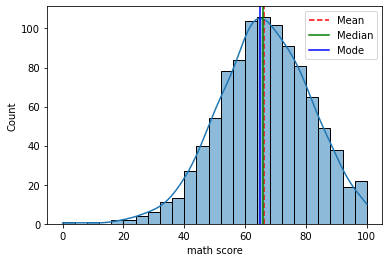

In [12]:
plt_hist('math score')

#### Nhận xét về sự phân bố dữ liệu `math score`

Dựa vào biểu đồ trực quan của dữ liệu `math score`:
- Sự phân bố của `mean`, `median` và `mode` gần như là như nhau => Biểu đồ sắp xỉ là `dạng chuẩn`
- Biểu đồ này là `Single mode`
- Các dữ liệu tập trung xung quanh khoảng 65 và các vài điểm dữ liệu nằm bên trái khoảng từ 0 đến 30 => Số học sinh khá chiếm đa số, số học sinh giỏi 80 điểm trở lên cũng cỡ 100 bạn (nghĩa là 10%)
- Nhìn thì có vẻ biểu đồ chúng ta bị lệch phải vì giá trị `mean` bị lệch 1 chút xíu về bên phải so với `median` và `mode`

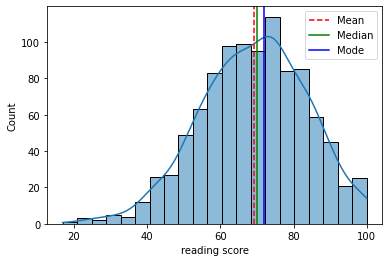

In [13]:
plt_hist('reading score')

#### Nhận xét về sự phân bố dữ liệu `reading score`

Dựa vào biểu đồ trực quan của dữ liệu `reading score`:
- Sự phân bố của `mean` và `median` lệch so `mode`
- Cụ thể là `mean` và `median` nằm về phía bên trái còn `mode` thì nằm về phía bên phải (`mean` và `median` ở khoảng 65 và `mode` là điểm 70)
- Biểu đồ này cũng là `Single mode` (Có thể là `Bi Modal` nhưng ở điểm dữ liệu khoảng 65 nó không cho thấy rõ điều đó, nó chỉ lệch 1 đoạn khá nhỏ thì đi xuống)
- Các dữ liệu cũng tập trung xung quanh khoảng 65 và các điểm dữ liệu nằm bên trái khoảng từ 0 đến 30 chiếm tỉ lệ nhỏ
- Biểu đồ này không phải ` dạng chuẩn ` vì độ lệch của ba giá trị `mean`, `median` và `mode` khá rõ

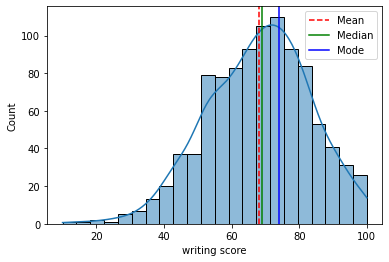

In [14]:
plt_hist('writing score')

#### Nhận xét về sự phân bố dữ liệu `writing score`

Dựa vào biểu đồ trực quan của dữ liệu `writing score`:
- Biểu đồ `writing score` khá tương đồng với biểu đồ `reading score`
- Sự phân bố của `mean` và `median` cũng lệch so `mode`
- Cụ thể là `mean` và `median` nằm về phía bên trái còn `mode` thì nằm về phía bên phải nhưng độ lệch của `mode` so với hai giá trị kia khá xa (Cụ thể `mean` và `median` ở khoảng 65 và `mode` là điểm gần 80)
- Biểu đồ này là `Single mode` 
- Các dữ liệu cũng tập trung xung quanh khoảng 65 và các điểm dữ liệu nằm bên trái khoảng từ 0 đến 30 chiếm tỉ lệ nhỏ => Ở môn `writing` thì các bạn có vẻ khá hơn 1 chút so với 2 môn còn lại, số học sinh gần giỏi nhiều, số học sinh giỏi cũng khá cao > 100 bạn
- Biểu đồ này không phải ` dạng chuẩn ` vì độ lệch của ba giá trị `mean`, `median` và `mode` khá rõ

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?
<a class="anchor" id="c328"></a>

#### Cái nhìn tổng quan của các thuộc tính dạng phân loại 

Đối với các thuộc tính `phân loại (categorical)`, chúng ta sẽ xem xét những thông tin về tính chất của các thuộc tính đó.

Chúng ta sẽ dùng phương thức `describe` để có thể xem xét cái thông số tổng quan của thuộc tính `object` bằng cách dùng phương thức `describe` kèm với tham số là `include=object`

Chỉ số của kết quả sẽ bao gồm `count (số lượng giá trị)`, `unique (số lượng giá trị khác nhau)`, `top (giá trị xuất hiện nhiều nhất)` và `freq (tần suất của giá trị xuất hiện nhiều nhất)`.

In [15]:
obj_col = list(df.select_dtypes(['object']).columns)
des = df[obj_col].describe(include=object).T
out = df[obj_col].agg(np.unique)
des.assign(unique_values = out)

,count,unique,top,freq,unique_values
gender,1000,2,female,518,"[female, male]"
race/ethnicity,1000,5,group C,319,"[group A, group B, group C, group D, group E]"
parental level of education,1000,6,some college,226,"[associate's degree, bachelor's degree, high s..."
lunch,1000,2,standard,645,"[free/reduced, standard]"
test preparation course,1000,2,none,642,"[completed, none]"


#### Nhận xét:
- Ta có 5 cột dữ liệu phân loại (categorical), số lượng dòng của mỗi cột đều là 1000 dòng.
- Với thuộc tính `gender`, ta có 2 giá trị khác biệt là `male` và `female`
- Với thuộc tính `race/ethnicity`, có 5 thuộc tính khác biệt là `group A`, `group_B`, `group_C`, `group_D`, `group_E`
- Với thuộc tính `parental level of education`, ta có 6 thuộc tính khác biệt là `associate's degree`, `bachelor's degree`, `high school`, ...
- Với thuộc tính `lunch`, ta có 2 thuộc tính khác biệt là `free/reduced` và `standard`
- Thuộc tính cuối cùng `test preparation course`, ta có 2 thuộc tính khác biệt là `completed` và `none`

#### Với mỗi thuộc tính, sự phân bố của các giá trị như thế nào ?

Để có cái nhìn chi tiết hơn về một thuộc tính `phân loại (categorical)`. Ở phần này, chúng ta sẽ sử dụng các biểu đồ (chart) để miêu tả các thông tin, cũng như sẽ giúp chúng ta quan sát được các giá trị một cách rõ ràng và hiểu sâu hơn.

Với việc so sánh các thuộc tính `phân loại (categorical)`, biểu đồ dạng `bar chart` phù hợp nhất cho việc so sánh các giá trị. 

Do đó, chúng ta sẽ xây dựng hàm `plot_bar` bao gồm các tham số như:
- `df` - Giá trị đầu vào để thể hiện biểu đồ
- `title` - Tên của biểu đồ
- `xlabel` - Tên của trục hoành
- `ylabel` - Tên của trục tung
- `orient` - Có 2 loại là: biểu đồ `bar` ngang và dọc (tương ứng với 'h' và 'v')

In [16]:
def plot_bar(df, title, xlabel, ylabel, orient):
    plt.figure(figsize=(8,6))
    
    if orient == 'v':
        ax = sns.barplot(x=df.index, y=df.values, orient='v')
    else:
        ax = sns.barplot(x=df.values, y=df.index, orient='h')
    
    rects = ax.patches
    ax.set_title(title)
    ax.set_xlabel(xlabel=xlabel)
    ax.set_ylabel(ylabel=ylabel)
    
    if orient == 'h':
        for rect, value in zip(rects, df.values):
            width = rect.get_width()
            plt.text(1.025*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                     value,
                     ha='center', va='center')
    else:
        for rect, value in zip(rects, df.values):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2, height + 5, value, ha="center", va="bottom"
            )

#### Thuộc tính `Gender`

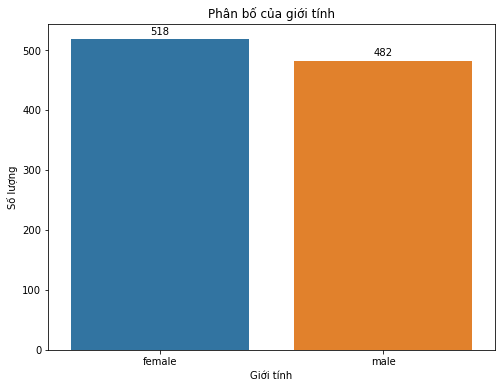

In [17]:
gender_counts = df.gender.value_counts()
plot_bar(gender_counts, 'Phân bố của giới tính', 'Giới tính', 'Số lượng', 'v')

#### Nhận xét

Số lượng nữ nhiều hơn số lượng nam trong dữ liệu này.
- Số lượng nữ là 518 người
- Số lượng nam là 482 người

Số lượng của 2 giới tính khá đồng đều (có chênh lệch 1 tí nhưng không sao) => Nếu có áp dụng cho mô hình học máy thì cũng đảm bảo được chất lượng của mô hình

Đối với thuộc tính `giới tính`, em lại muốn kể một câu chuyện về gia đình em. Gia đình em là một gia đình bình thường (không khá giả gì mấy), em sống chung với mẹ em và chị. Khi lúc còn học tiểu học, em cũng thuộc loại `thứ dữ (làm lớp trưởng và học lực đứng nhất lớp :)) )` và mẹ em hay kể với các cô chú hàng xóm rằng `con tui nó làm lớp trưởng đó, nó là con trai mà học giỏi hơn con gái` (theo quan niệm thời xa xưa thì con gái có những tính chất cẩn thận, siêng năng, cần cù, chăm ngoan, lễ phép, ... Gần như mọi thứ đều được hoàn quyện vào con gái ??)

Em cũng thắc mắc, và có hỏi mẹ sao mẹ hay nói như thế. Mẹ em trả lời rằng điều đó là thực tế mà...

Vậy ở dữ liệu của chúng ta, khá phù hợp để em có thể giải đáp thắc mắc `con trai hay con gái học giỏi hơn ?` và câu hỏi dài đằng đẵng mấy năm trời của em có thể tìm được câu trả lời... `(trả lời ở câu hỏi thứ 2)`

#### Thuộc tính `Race/ethnicity`

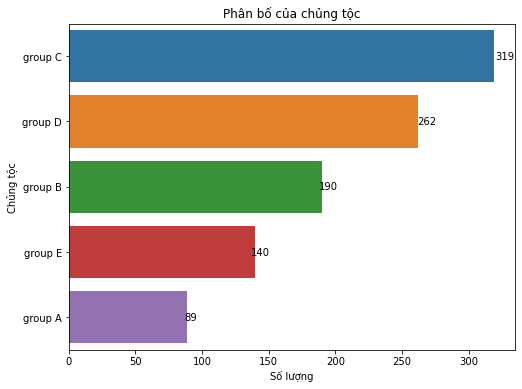

In [18]:
race_counts = df['race/ethnicity'].value_counts()
plot_bar(race_counts, 'Phân bố của chủng tộc', 'Số lượng', 'Chủng tộc', 'h')

#### Nhận xét

Nhìn vào biểu đồ `horizontal bar` của thuộc tính `Chủng tộc`:
- `Group C` là nhóm chiếm đa số học sinh nhất (319 người)
- `Group A` là nhóm có ít học sinh nhất (89 người)

#### Thuộc tính `Parental level of education`

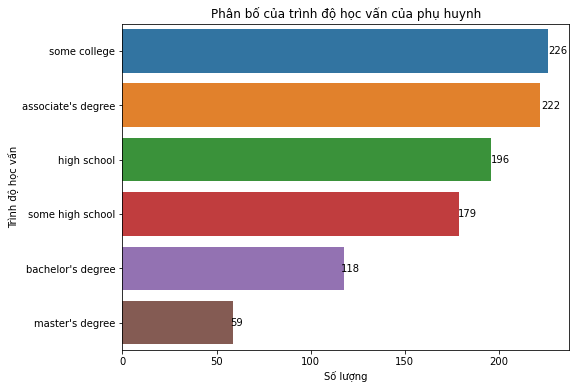

In [19]:
edu_counts = df['parental level of education'].value_counts()
plot_bar(edu_counts, 'Phân bố của trình độ học vấn của phụ huynh', 'Số lượng', 'Trình độ học vấn', 'h')

#### Nhận xét

Chúng ta sẽ xem biểu đồ và trả lời cho câu hỏi `Trình độ học vấn của phụ huynh học sinh phân bố như thế nào ?`

Có thể thấy, đa số phụ huynh của học sinh có bằng `đại học (226 người)` và `cao đẳng (222 người)` chiếm đa số khoảng 50% tổng số phụ huynh học sinh. Có khoảng `59 phụ huynh` có bằng `master (giáo sư)` (vậy đứa con cũng đáng gờm lắm ? :D) và khoảng `118 phụ huynh` có bằng `bachelor (cử nhân)` (Bằng đại học bây giờ là cử nhân rồi ?) 

Vậy cuối cùng, chúng ta có thể thấy trình độ của phụ huynh đa số là `bằng đại học` (có kiến thức và văn hóa) và một số ít phụ huynh có `bằng trung cấp`. Có thể thực tế này ảnh hưởng đến khả năng học tập của các con hay không ? (Chúng ta sẽ hiểu cùng tìm hiểu thông qua `câu hỏi thứ nhất của bạn Ân nhé `)

#### Thuộc tính `lunch`

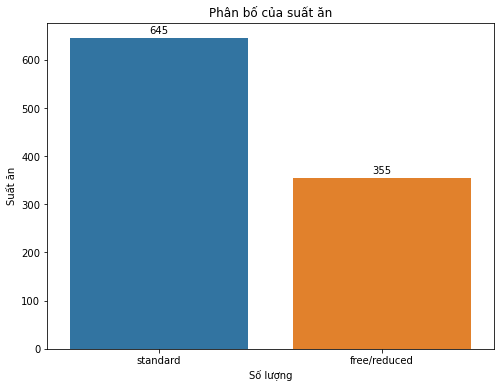

In [20]:
lunch_counts = df.lunch.value_counts()
plot_bar(lunch_counts, 'Phân bố của suất ăn', 'Số lượng', 'Suất ăn', 'v')

#### Nhận xét

`Câu chuyện hổi còn nhỏ:`

Nhớ lại thời còn đi học tiểu học của em, một ngày em được mẹ cho 5 ngàn để ăn trong trường lúc ra chơi thì em chỉ mua được một ly nước ngọt thì đã hết tiền. Thời đó lớp em có mấy đứa bạn nhà cũng khá giả, ra chơi tụi bạn mua được nhiều đồ ăn hơn, nào là bánh, kẹo, bánh tráng, nước ngọt.... Lúc đó em lại cảm thấy tự ti, cảm nhận được sự chênh lệch giàu nghèo giữa những đứa bạn trong lớp (Một tâm lý khá ngây thơ và trong sáng lúc bấy giờ). Nhưng thật sự em thấy rằng, nhà đứa nào nghèo thường hay học giỏi, và ngược lại (có thể đụng chạm nhiều người... nhưng đây là cái sự thật em thấy trong xã hội)

Ở các vùng quê nghèo khó, đa số là những bạn nhân tài và ưu tú, dù không đầy đủ về điều kiện vật chất, tinh thần nhưng các bạn thật sự cố gắng để vươn lên, với ước mơ có thể thoát khỏi `cái nghèo`. Điều đó cũng được thể hiện qua nhiều tấm gương nổi bật như: `anh Nguyễn Ngọc Ký `, `Bác Hồ chủ tịch`, và nhiều tấm gương tiêu biểu được lên báo, ...

Do đó, chúng ta cũng sẽ giải đáp thực sự liệu `món ăn vật chất` có ảnh hưởng đến kết quả học tập của các em học sinh không ? `(giải đáp sẽ được trả lời ở câu hỏi thứ nhất)`

### Đưa ra câu hỏi có ý nghĩa cần trả lời <a class="anchor" id="c33"></a>

## Nguồn tham khảo <a class="anchor" id="c4"></a>